### part 3 : company clustering customers

A company has gathered data about its customers and would like to identify similar clients, in order to propose relevant products to new clients, based on their features. This can be represented as a clustering problem. The data are stored in exercise_3/data.npy. They are 4 dimensional.


Pick:

— two clustering methods

— two heuristics to choose a relevant number of clusters,

and perform different clusterings of this dataset (overall, you have 2 ×2 = 4 methods). You must use a different metric for each clustering method. You could for instance use the standard euclidean metric for one method, and a different metric for the other method, for instance based on a rescaling of the dimensions of the data (hence, you could transform the data first, and apply a known metric on the
transformed data.)


Compare and discuss the difference between the results of the different methods you tried. Discuss whether one mehod (combination of the clustering method and of heuristic) seems to give more interesting or clearer results than the others.


You may use libraries such as scikit-learn in order to implement the methods.

### Prepare the data in two metrics (euclidean and cosine)

For this exercise, we will use the euclidean and cosine metrics.

In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

data = np.load('data.npy')

Euclidean = data
Cosine = cosine_similarity(data)

### Declare a function to train and plot the results of the clustering

We will declare a generic function to train and plot the results of the clustering.

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

def perform_clustering(methodRequested, metric, numberOfCluster, title):

    METHODS = {
        'KMeans': KMeans(n_clusters=numberOfCluster, n_init='auto'),
        'AgglomerativeClustering': AgglomerativeClustering(n_clusters=numberOfCluster)
    }
    # Fit and predict clusters
    labels = METHODS[methodRequested].fit_predict(metric)

    # Visualize the results
    plt.scatter(metric[:, 0], metric[:, 1], c=labels, cmap='viridis', edgecolor='k')
    plt.title(title)
    plt.show()


### K-means and AgglomerativeClustering with euclidean metric

First, we will use the K-means and AgglomerativeClustering methods with the euclidean metric.

In order to do so, we will determine the optimal number of clusters for the Euclidean metric using the elbow method.

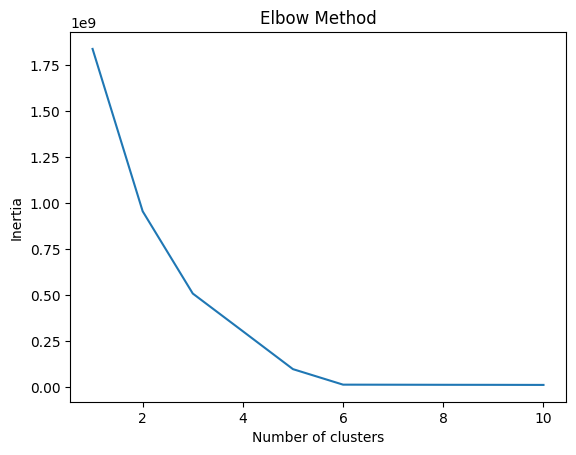

In [3]:
ListKMeansInertia = []
for numberOfCluster in range(1, 11):
    kmeans = KMeans(n_clusters=numberOfCluster, n_init='auto').fit(Euclidean)
    ListKMeansInertia.append(kmeans.inertia_)

plt.plot(range(1, 11), ListKMeansInertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


With the elbow method, we will determine that the optimal number of clusters is 6.

Let's train the K-means and AgglomerativeClustering methods with the euclidean metric and 6 clusters.

Number of cluster for Euclidean :  6


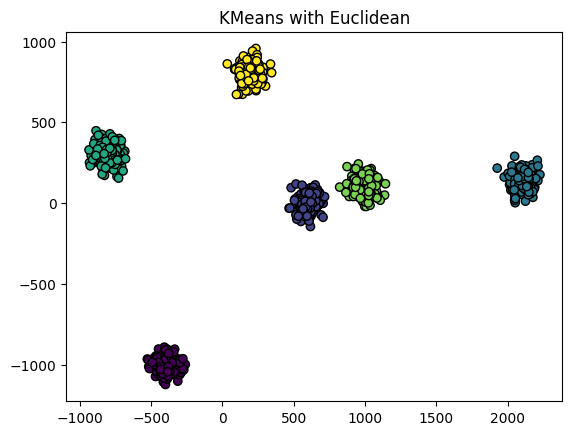

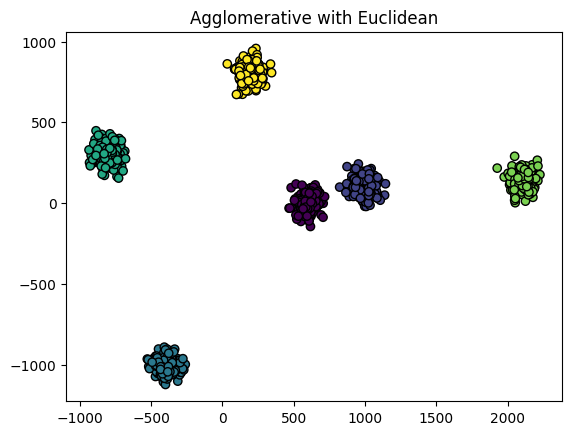

In [12]:
NUMBER_OF_CLUSTER_EUCLIDEAN = 6
print("Number of cluster for Euclidean : ", NUMBER_OF_CLUSTER_EUCLIDEAN)

perform_clustering("KMeans", Euclidean, NUMBER_OF_CLUSTER_EUCLIDEAN, 'KMeans with Euclidean')
perform_clustering("AgglomerativeClustering", Euclidean, NUMBER_OF_CLUSTER_EUCLIDEAN, 'Agglomerative with Euclidean')

### Agglomerative clustering

Now we will use the Agglomerative clustering algorithm with the euclidean metric and the cosine metric.

As done previously, we will determine the optimal number of clusters for the cosine metric using the elbow method.

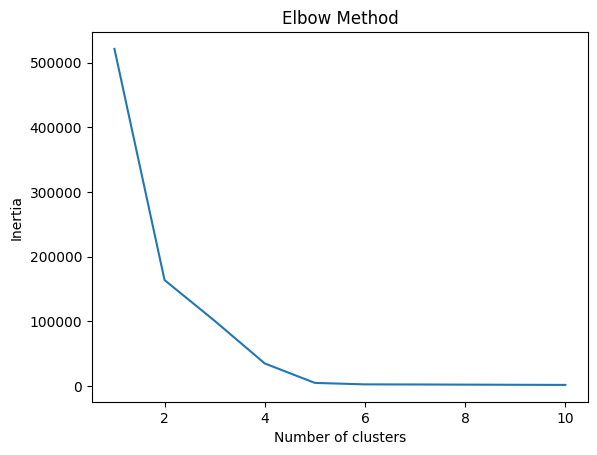

In [5]:
ListKMeansInertia = []
for numberOfCluster in range(1, 11):
    kmeans = KMeans(n_clusters=numberOfCluster, n_init='auto').fit(Cosine)
    ListKMeansInertia.append(kmeans.inertia_)

plt.plot(range(1, 11), ListKMeansInertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

With the elbow method, we will determine that the optimal number of clusters is 5.

Let's train the Agglomerative clustering algorithm with the euclidean metric and 5 clusters.

Optimal Number of Cluster: 5


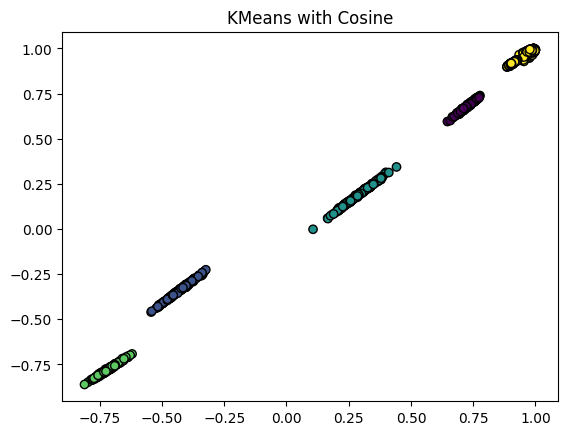

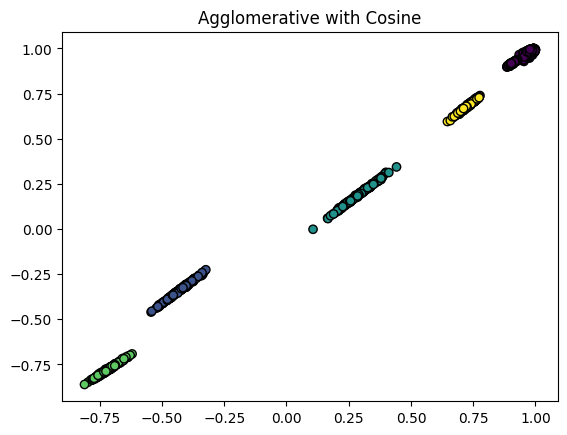

In [6]:
NUMBER_OF_CLUSTER_COSINE = 5
print("Optimal Number of Cluster:", NUMBER_OF_CLUSTER_COSINE)

perform_clustering("KMeans", Cosine, NUMBER_OF_CLUSTER_COSINE, 'KMeans with Cosine')
perform_clustering("AgglomerativeClustering", Cosine, NUMBER_OF_CLUSTER_COSINE, 'Agglomerative with Cosine')

### Conclusion

We can see that the results of the clustering are different depending on the metric used. Indeed, the number of clusters is different depending on the metric used (6 clusters for the euclidean metric and 5 clusters for the cosine metric). 

As, the cosine metric returns a lower number of clusters, in comparison with the real data, we can suppose that the cosine metric loose information. This shows that the cosine metric is not adapted to this dataset.

Otherwise, we can see no difference between the results of the K-means and Agglomerative clustering algorithms for each metric. This show that the two algorithms are equivalent for this dataset, and both of them can be used.